___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [22]:
df = pd.read_csv("C:/Users/HTC/Downloads/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Explore Data

You can rename columns to more usable, if you need.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





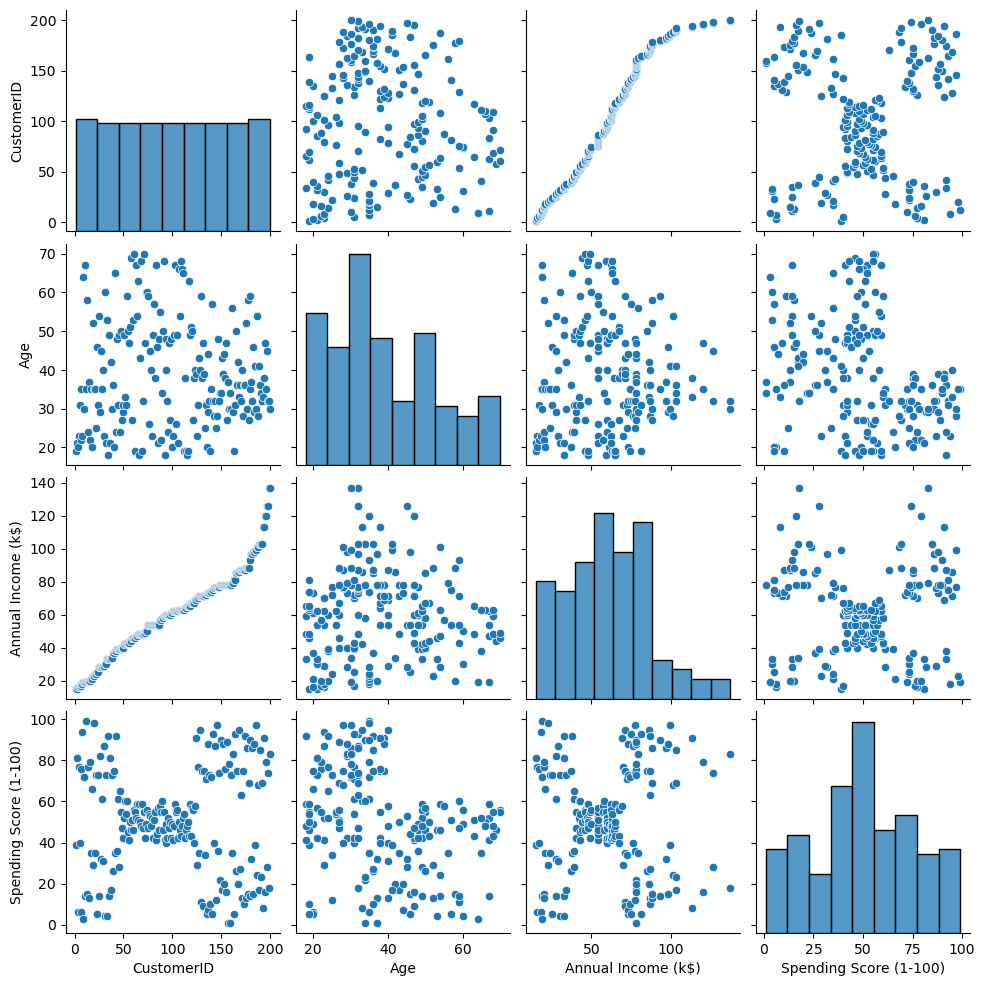

In [24]:
sns.pairplot(df)
plt.show()

In [25]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [27]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Categorical Variables:
Index(['Gender'], dtype='object')
Numerical Variables:
['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
CustomerID
Skew : 0.0


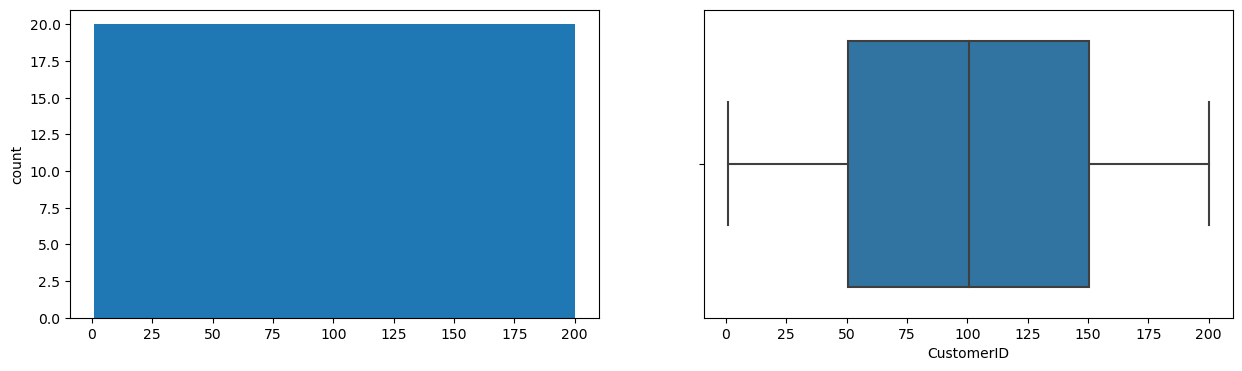

Age
Skew : 0.49


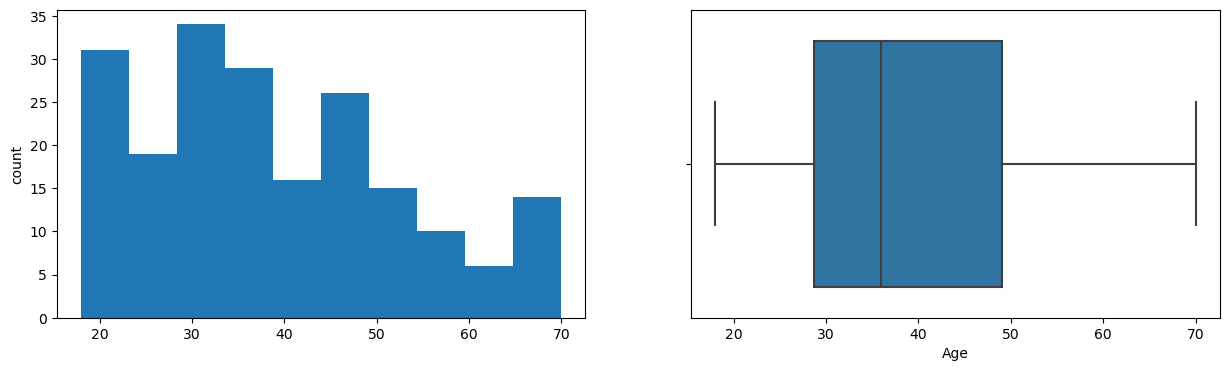

Annual Income (k$)
Skew : 0.32


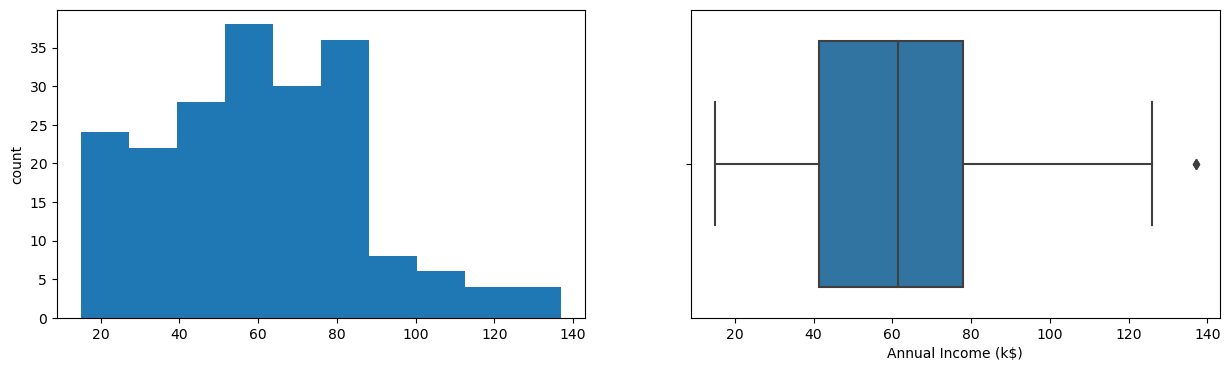

Spending Score (1-100)
Skew : -0.05


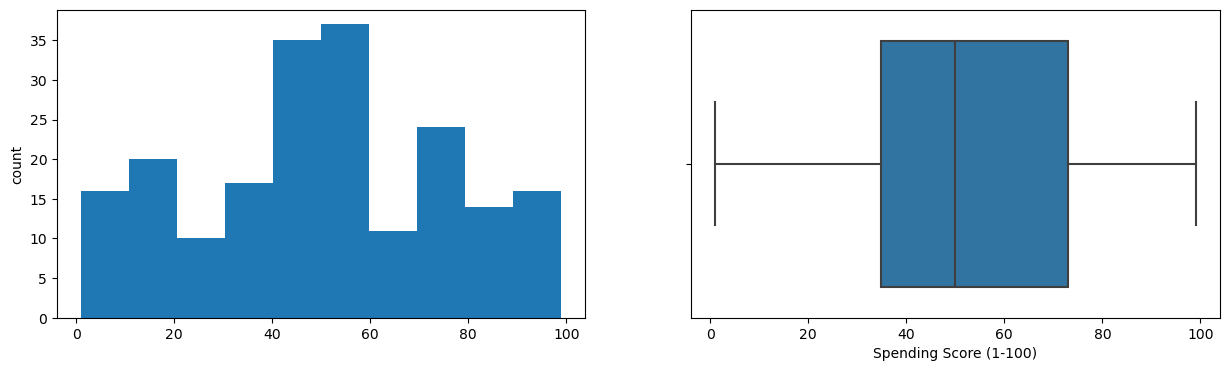

In [28]:
# check for each numerical feature boxplot and skew also we have now two categorical variables
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [29]:
df.shape

(200, 5)

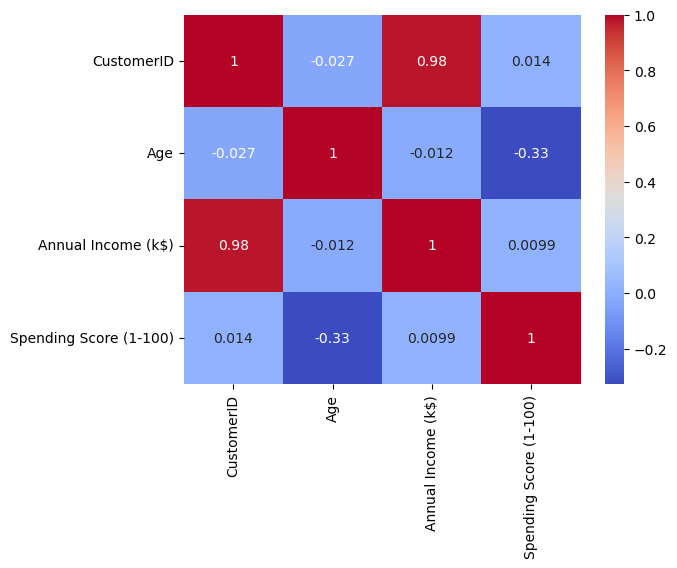

In [30]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

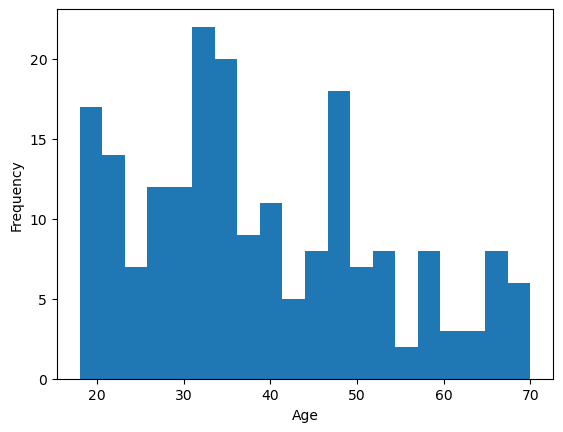

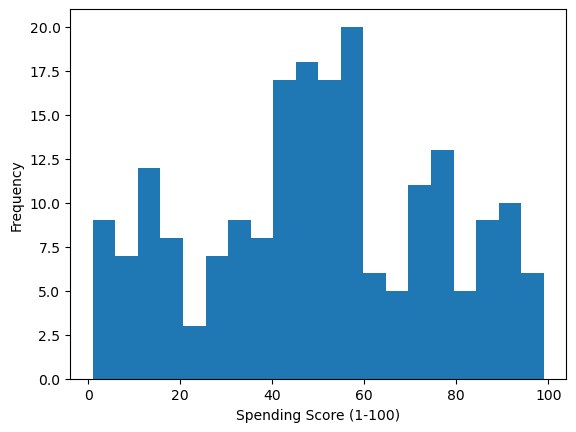

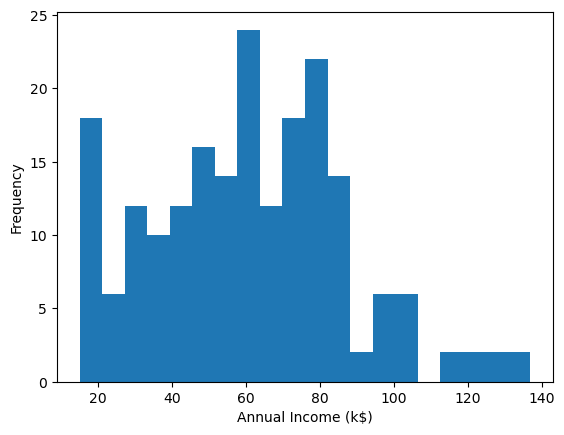

In [31]:
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['Spending Score (1-100)'], bins=20)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()



plt.hist(df['Annual Income (k$)'], bins=20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

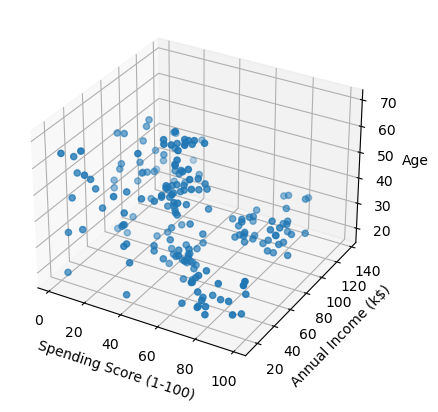

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], df['Age'], cmap='rainbow')
ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Age')
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [33]:
selected_columns = ['Age', 'Spending Score (1-100)']
new_df = df[selected_columns]

#### *ii. Determine optimal number of clusters*

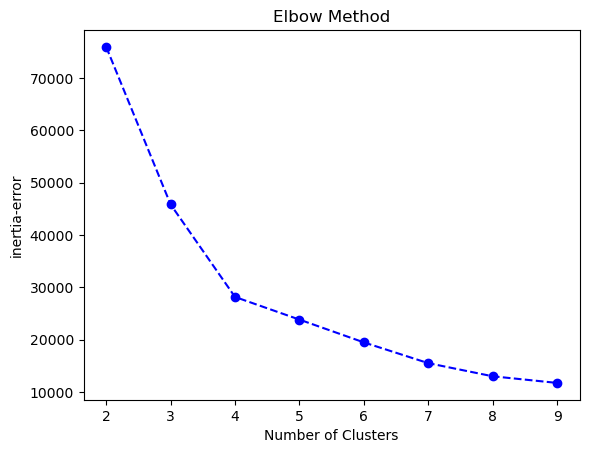

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(new_df)
    ssd.append(model.inertia_) # Inertia calculates WCSS

# Plotting the Elbow graph

plt.plot(K, ssd, "bo--")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia-error')  # Within-cluster sum of squares
plt.show()
# Determine optimal number of clusters = 4

### Why silhouette_score is negative?

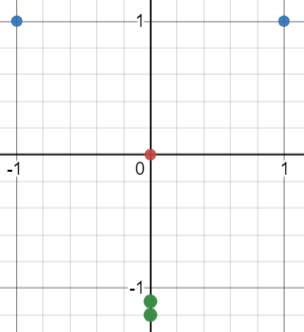

#### *iii. Apply K Means*

In [35]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=4,
                       random_state=42)

In [36]:
K_means_model.fit(new_df)

KMeans(n_clusters=4, random_state=42)

In [37]:
K_means_model.predict(new_df)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [38]:
K_means_model.fit_predict(new_df)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#### *iv. Visualizing and Labeling All the Clusters*

In [39]:
K_means_model.labels_

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [43]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [44]:
new_df.shape

(200, 2)

In [45]:
hopkins(new_df, 0.05)

0.8533679092240481

In [46]:
hopkins(new_df, 1)

0.682932191034815

In [48]:
from sklearn.metrics import silhouette_score
silhouette_score(new_df, K_means_model.labels_)

0.49973941540141753

In [49]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(new_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(new_df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


In [50]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


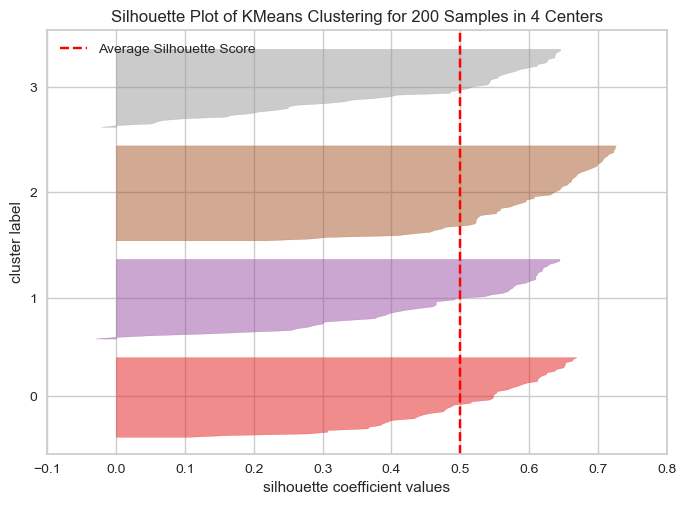

In [102]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4,
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(new_df)    # Fit the data to the visualizer
visualizer.poof();

In [103]:
model3.labels_

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [104]:
visualizer.silhouette_samples_

array([ 0.5417044 ,  0.60662047,  0.39069235,  0.57267015,  0.48587714,
        0.52995369,  0.59968529,  0.64553243,  0.43866118,  0.4778869 ,
        0.3010273 ,  0.63366431,  0.4642001 ,  0.58743966,  0.61188739,
        0.59552698,  0.24951537,  0.00082   ,  0.05351466,  0.64359679,
        0.24951537,  0.47269685,  0.62846092,  0.52348601,  0.5441497 ,
        0.7056195 ,  0.00180808,  0.26184863,  0.13290243,  0.66898081,
        0.49473531,  0.40692548,  0.57537231,  0.59423864,  0.60858088,
        0.60662047,  0.61969263,  0.52218675,  0.30136345,  0.4613876 ,
        0.39397599,  0.66743113,  0.30665539,  0.3039629 ,  0.18922019,
        0.05169513,  0.48647744,  0.62665965,  0.55521749,  0.51260319,
        0.48979111,  0.34189353,  0.54229073,  0.55201271,  0.54222972,
        0.38712546,  0.56786531,  0.61381451,  0.63637533,  0.61138728,
        0.58859854,  0.53847734,  0.63873408,  0.51324684,  0.66206919,
        0.39712482,  0.16016828,  0.63662025,  0.40782898,  0.51

In [105]:
labels_1 = (model3.labels_ == 1)

In [106]:
visualizer.silhouette_samples_[labels_1]

array([ 0.39069235,  0.59968529,  0.43866118,  0.3010273 ,  0.4642001 ,
        0.61188739,  0.05351466,  0.62846092,  0.5441497 ,  0.00180808,
        0.13290243,  0.49473531,  0.57537231,  0.60858088,  0.61969263,
        0.30136345,  0.18922019,  0.48935675,  0.63722118,  0.39597756,
        0.64405628,  0.33697359,  0.53474313,  0.42078766,  0.40711097,
        0.61800549,  0.56092567,  0.60895931,  0.59458983,  0.5709067 ,
        0.38040952,  0.27855476,  0.56868663,  0.25358842,  0.64338796,
        0.61160444,  0.58119861,  0.4642001 ,  0.45937084, -0.02972614,
        0.62601044,  0.28762596,  0.61914457,  0.37426429,  0.57727112,
        0.60895931,  0.26126639,  0.46455719])

In [107]:

mean_silhoutte_score_1 = visualizer.silhouette_samples_[labels_1].mean()
mean_silhoutte_score_1

0.45429047261675404

In [108]:
for i in range(4):
    label = (model3.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.45429047261675404
mean silhouette score for label 2    : 0.5963385694657906
mean silhouette score for label 3    : 0.41996892632380806
mean silhouette score for all labels : 0.49987008289218265


In [110]:
clusters1 = model3.labels_
new_df["predicted_clusters"] = clusters1
new_df

C:\Users\HTC\AppData\Local\Temp\ipykernel_15592\3680657270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["predicted_clusters"] = clusters1


,Age,Spending Score (1-100),predicted_clusters
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [58]:
selected_columns = ['Annual Income (k$)', 'Spending Score (1-100)']
new_df1 = df[selected_columns]

#### *ii. Determine optimal number of clusters*

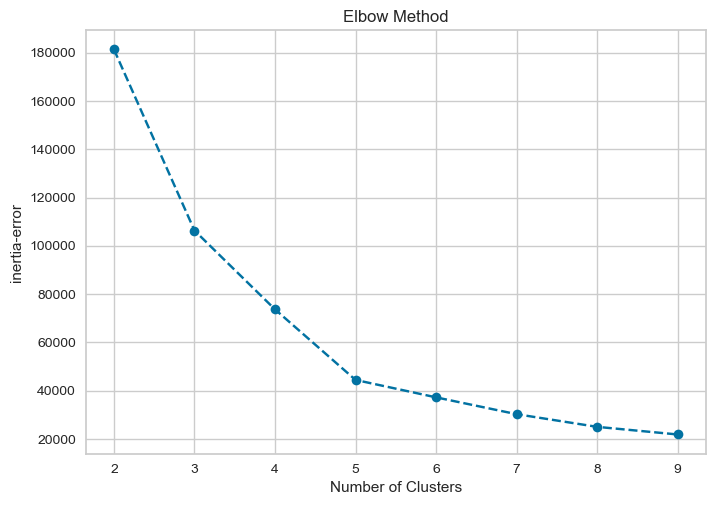

In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(new_df1)
    ssd.append(model.inertia_) # Inertia calculates WCSS

# Plotting the Elbow graph

plt.plot(K, ssd, "bo--")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia-error')  # Within-cluster sum of squares
plt.show()
# Determine optimal number of clusters = 5

#### *iii. Apply K Means*

In [60]:
from sklearn.cluster import KMeans

K_means_model1 = KMeans(n_clusters=5,
                       random_state=42)

In [61]:
K_means_model1.fit(new_df1)

KMeans(n_clusters=5, random_state=42)

In [62]:
K_means_model1.predict(new_df1)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [63]:
K_means_model1.fit_predict(new_df1)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

#### *iv. Visualizing and Labeling All the Clusters*

In [64]:
K_means_model1.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [66]:
# Calculate cluster centers
cluster_centers = kmeans.cluster_centers_

# Print cluster centers (for 2D data)
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i} Center: Annual Income={center[0]}, Spending Score={center[1]}")


Cluster 0 Center: Annual Income=29.249999999999996, Spending Score=72.19444444444443
Cluster 1 Center: Annual Income=41.08695652173913, Spending Score=31.56521739130436
Cluster 2 Center: Annual Income=64.85, Spending Score=49.85
Cluster 3 Center: Annual Income=31.285714285714292, Spending Score=90.39285714285712
Cluster 4 Center: Annual Income=48.14814814814815, Spending Score=49.51851851851852
Cluster 5 Center: Annual Income=51.78260869565217, Spending Score=12.565217391304337
Cluster 6 Center: Annual Income=29.769230769230774, Spending Score=8.307692307692307
Cluster 7 Center: Annual Income=24.033333333333328, Spending Score=48.43333333333333


In [67]:
hopkins(new_df1, 0.05)

0.669910839362815

In [68]:
hopkins(new_df1, 1)

0.6910873014238024

In [69]:
silhouette_score(new_df1, K_means_model1.labels_)

0.553931997444648

In [70]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(new_df1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(new_df1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


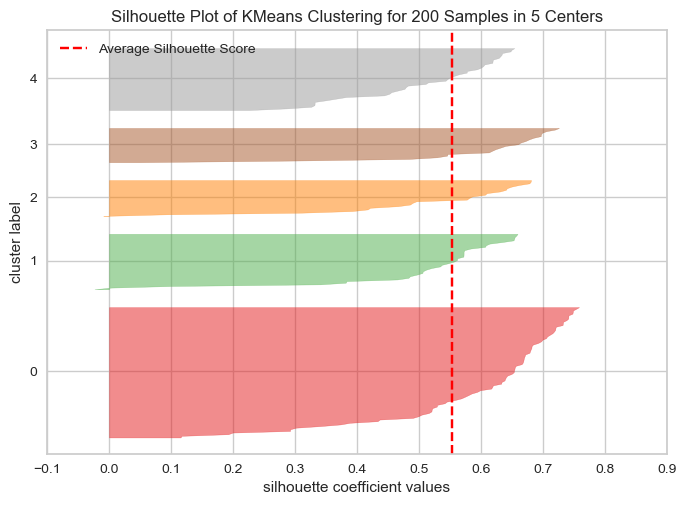

In [111]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5,
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(new_df1)    # Fit the data to the visualizer
visualizer.poof();

In [112]:
model3.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [113]:
visualizer.silhouette_samples_

array([ 0.41700493,  0.69637752,  0.6399526 ,  0.6964831 ,  0.39230007,
        0.6981303 ,  0.64910316,  0.65972193,  0.63021343,  0.66350398,
        0.67788678,  0.62355268,  0.68003912,  0.71908624,  0.68070792,
        0.72573786,  0.48557434,  0.54505971,  0.58062414,  0.631684  ,
        0.46597803,  0.6774284 ,  0.64167396,  0.67170097,  0.66126882,
        0.70488566,  0.48931822,  0.30121073,  0.49570828,  0.6847372 ,
        0.60630845,  0.612474  ,  0.57697817,  0.61775968,  0.60922585,
        0.63936997,  0.58581667,  0.52897452,  0.42116018,  0.48378692,
        0.09342298,  0.54589636, -0.00927769,  0.1170758 ,  0.31116673,
        0.0507214 ,  0.38841392,  0.43312564,  0.29204034,  0.29204034,
        0.5203998 ,  0.30155503,  0.51561237,  0.34144075,  0.48988757,
        0.37332421,  0.59860522,  0.54128572,  0.63883859,  0.59367906,
        0.55806656,  0.57952023,  0.64920886,  0.50415514,  0.67809813,
        0.52881485,  0.68358333,  0.66547762,  0.52881485,  0.65

In [114]:
labels_1 = (model3.labels_ == 4)
visualizer.silhouette_samples_[labels_1]
mean_silhoutte_score_1 = visualizer.silhouette_samples_[labels_1].mean()
mean_silhoutte_score_1

0.5091706489322517

In [115]:
for i in range(5):
    label = (model3.labels_== i)
    print(f"mean silhouette score for label {i:<6} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0      : 0.5966512190217801
mean silhouette score for label 1      : 0.5039873487056818
mean silhouette score for label 2      : 0.5122676140736505
mean silhouette score for label 3      : 0.5990128687006722
mean silhouette score for label 4      : 0.5091706489322517
mean silhouette score for all labels : 0.553931997444648


In [ ]:
clusters2 = model3.labels_
new_df["predicted_clusters"] = clusters2
new_df

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [76]:
selected_columns_H = ['Age', 'Spending Score (1-100)']
df1_hier = df[selected_columns_H]

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage

import scipy.cluster.hierarchy as sch

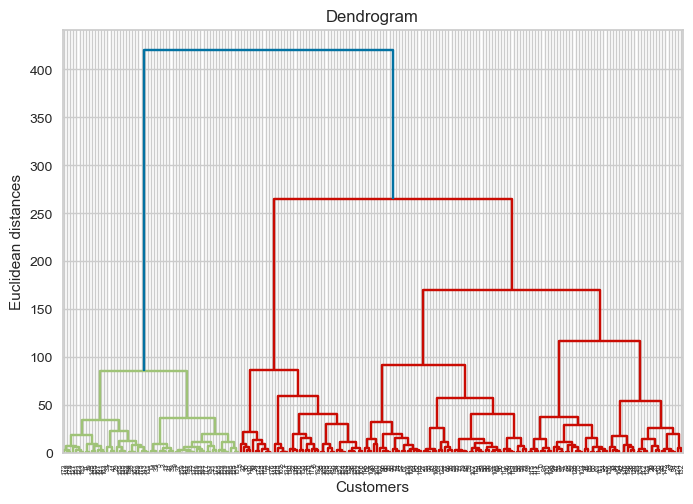

In [78]:

# Create a dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(df1_hier, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Clustering based on Annual Income and Spending Score- x2

In [79]:
selected_columns_H1 = ['Annual Income (k$)', 'Spending Score (1-100)']
df11_hier = df[selected_columns_H1]

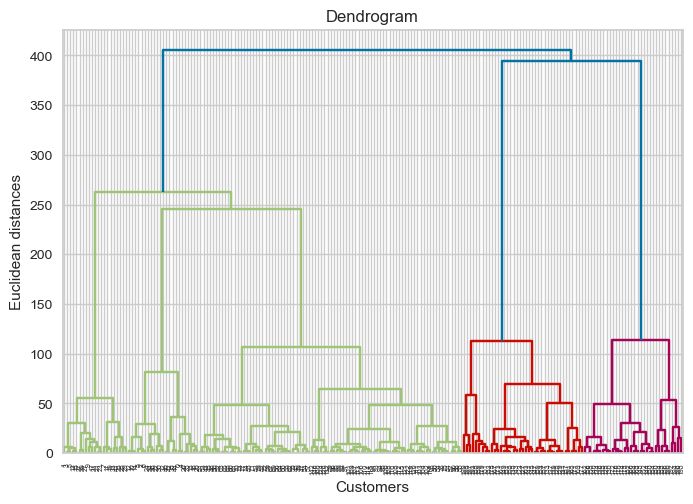

In [80]:
# Create a dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(df11_hier, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [81]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [82]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(df1_hier)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1_hier, model.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


In [94]:
# 2 OR 4 K  but i chose based on dendogram 
model = AgglomerativeClustering(n_clusters=2,
                                 affinity='euclidean',
                                linkage="ward")
cluster_labels = model.fit_predict(df1_hier)

#### Annual Income and Spending Score- x2

In [84]:
# 5 
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(df11_hier)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df11_hier, model.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


In [85]:
model = AgglomerativeClustering(n_clusters=5,
                                 affinity='euclidean',
                                linkage="ward")
cluster_labels1 = model.fit_predict(df11_hier)


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

In [95]:
df1_hier['Cluster'] = cluster_labels
df1_hier

C:\Users\HTC\AppData\Local\Temp\ipykernel_15592\2485359912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_hier['Cluster'] = cluster_labels


,Age,Spending Score (1-100),Cluster
0,19,39,0
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,0
...,...,...,...
195,35,79,1
196,45,28,0
197,32,74,1
198,32,18,0


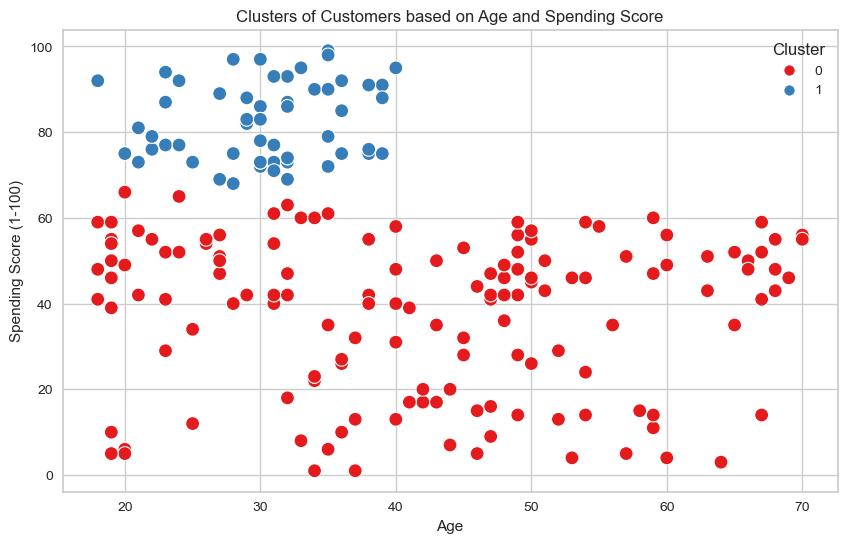

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df1_hier, palette='Set1', s=100)
plt.title('Clusters of Customers based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


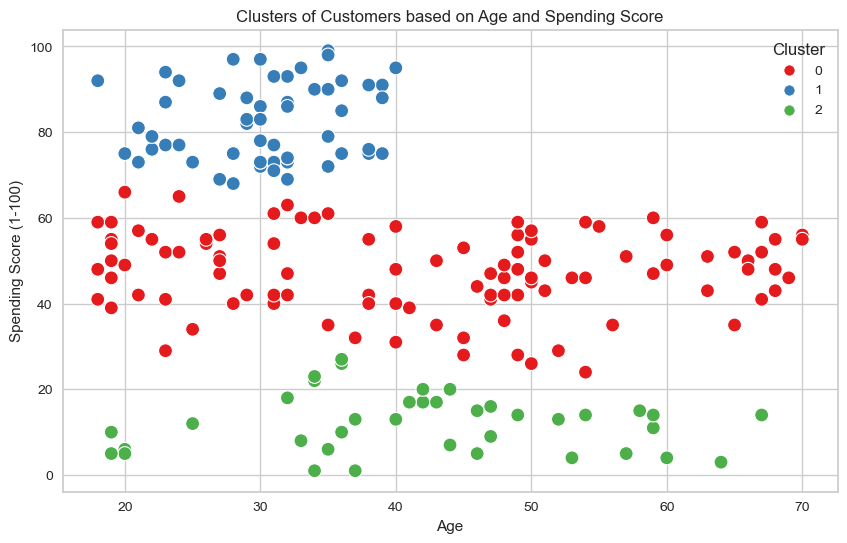

In [90]:
# try with 3 cluster 
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df1_hier, palette='Set1', s=100)
plt.title('Clusters of Customers based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


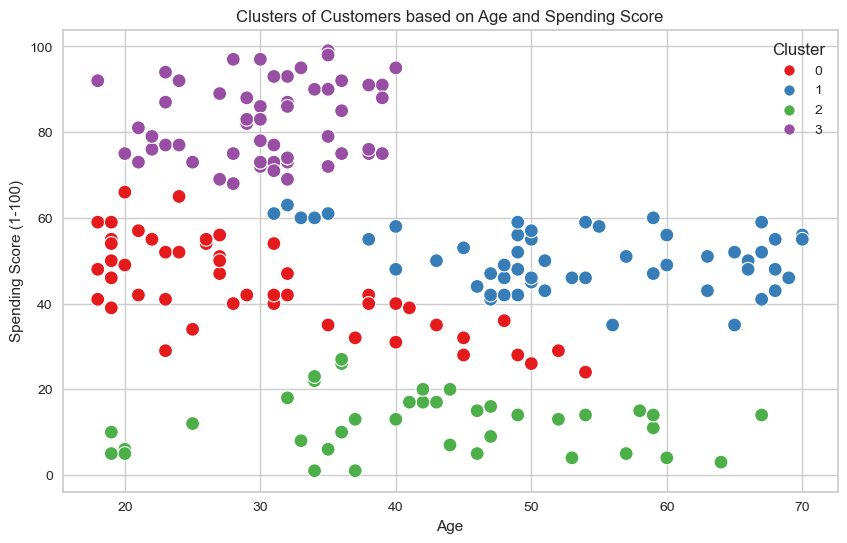

In [93]:
# try with 4 cluster 
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df1_hier, palette='Set1', s=100)
plt.title('Clusters of Customers based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


<Figure size 1000x1000 with 0 Axes>

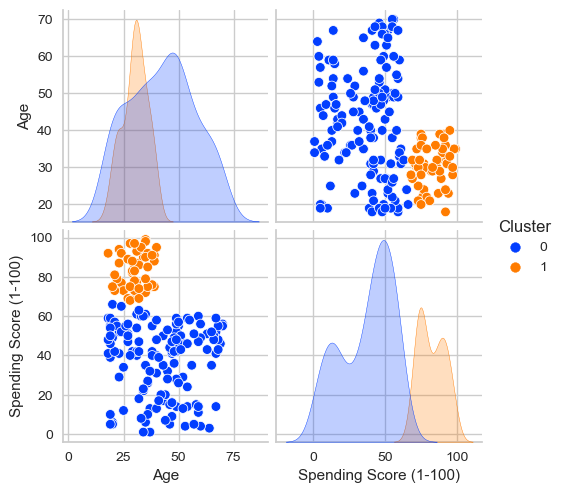

In [96]:

plt.figure(figsize = (10,10))
sns.pairplot(data=df1_hier, hue="Cluster", palette="bright");
plt.show()

#### Annual Income and Spending Score- x2

In [97]:
df11_hier['Cluster1'] = cluster_labels1
df11_hier

C:\Users\HTC\AppData\Local\Temp\ipykernel_15592\3517029636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11_hier['Cluster1'] = cluster_labels1


,Annual Income (k$),Spending Score (1-100),Cluster1
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


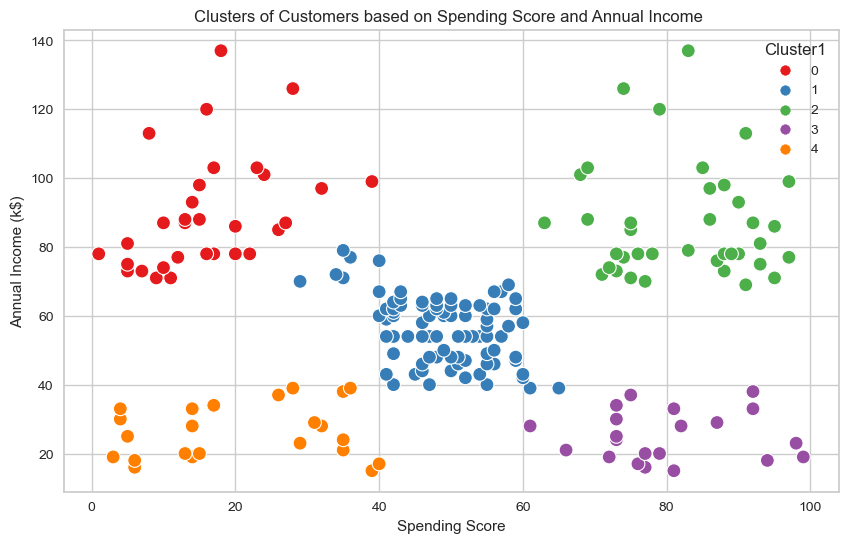

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', hue='Cluster1', data=df11_hier, palette='Set1', s=100)
plt.title('Clusters of Customers based on Spending Score and Annual Income ')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income (k$)')
plt.show()


<Figure size 1000x1000 with 0 Axes>

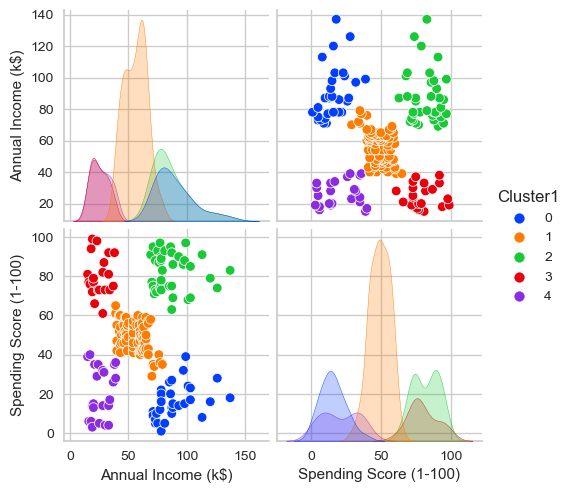

In [99]:
plt.figure(figsize = (10,10))
sns.pairplot(data=df11_hier, hue="Cluster1", palette="bright");
plt.show()

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___